In [70]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf


In [64]:
df=yf.download('IBM','2008-01-01', '2021-1-20', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [65]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,74.700002,75.034244,73.165211,73.738197,5732300
2008-01-02,74.345278,74.345278,71.057414,71.412125,9503500
2008-01-03,71.507648,72.012423,70.927839,71.555397,7528900
2008-01-04,70.907331,70.907331,68.540347,68.983727,11034600
2008-01-07,68.383471,68.895068,67.551273,68.247047,12650400


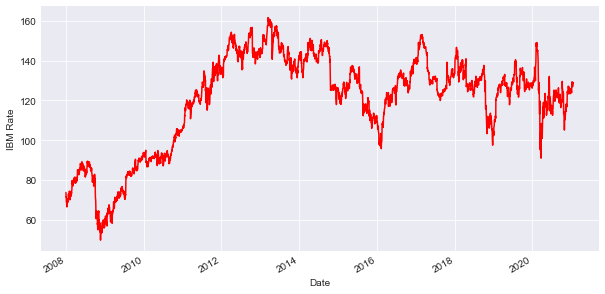

In [66]:
df=df[['Close']]
df= df.dropna()
df.Close.plot(figsize=(10,5),color='r')
plt.ylabel("IBM Rate")
plt.show()

In [67]:
df['3days']=df['Close'].rolling(window=3).mean()
df['9days']=df['Close'].rolling(window=9).mean()
df['nxtd']=df['Close'].shift(-1)
df=df.dropna()
X=df[['3days','9days']]
y=df['nxtd']



In [68]:
t = .8
t = int(t*len(df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [71]:
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("IBM rate (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
IBM rate (y) = 1.15 * 3 Days Moving Average (x1) + -0.15 * 9 Days Moving Average (x2) + 0.45 (constant)


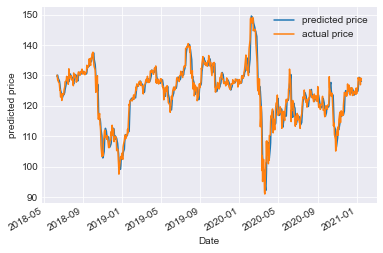

In [80]:
predicted_price=linear.predict(X_test)
predicted_price=pd.DataFrame(predicted_price, index=y_test.index)
predicted_price.plot()
y_test.plot()
plt.legend(['predicted price', 'actual price'])
plt.ylabel("predicted price")
plt.show()


In [83]:
r2_value=linear.score(X[:t],y[:t])
float("{0:.2f}".format(r2_value))

1.0